In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Assignment 3: Market Indices

Name:Jai Betala

Student Number: 20939135

Due: 2021/10/29 at 11:59pm on Dropbox

What to submit: both your .ipynb and .pdf files.

Please make sure that each question outputs onto a new page. 
You can do this by inserting a code chunk with the following after each question.
```
%%latex
\newpage
```

## Rules
* Follow the format of the template notebook to complete this assignment
* Make sure to comment on any new variables and functions that you are using. If you are doubtful whether you should explain a part of your code, it is better to explain it. 
* Please make sure to conclude your final answers in a statement (if applicable) at the end of each question.
* AVOID hard-coding numbers, for example, if you want to know how many elements are in a string (and other data structures), use the len() method, DO NOT count the number by hand.

## Objectives
At the end of the assignment, you will:
* Understand the different methods to build a market index
* Understand how the value of a market index can change over time

## BONUS

After you have completed the assignment as instructed, you will hand in your two files.  The bonus part is separate from this, and saved under a new file titled "Market_Index_Bonus_NAME.ipynb" where NAME is your complete name.  You need only hand in your bonus code, thus if you are doing the bonus, you will hand in three files, two for the main assignment, and one for the bonus.  Please note that this bonus quesiton is not easy, and the bonus point will only be awarded if you are sucessful.  DO NOT hand in unsuccessful attempts.  Although this part is not worth much relative to the amount of work it will take, this level of coding will be required in the group assignment, and potentially in individual assignment 4.  Thus, it may be worth attempting so that you aren't overwhelmed later.

To complete the bonus part, you must write fully dynamic code that allows the user (your professor and the marker) to specify any (finite) number of (valid) US stock tickers to include in the index.  Your code must start by defining a list: Tickers = ["ticker1", "ticker2", "ticker3",...,"tickerN"]

We will test your code with a predefined list of tickers, the length of which is unknown to you (hint: it will be greater than 3, but not so large that it will take too long to call up all the market data and manipulate it).  We promise you that the tickers we use will be value US stocks that have complete data available for the time period in question.

### Data 

For this assignment, all the data will come from **Yahoo Finance**. This will be used to collect the stock information, and then you will use Python to complete the remainder of the assignment. 

**Language:** Python 

**Libraries Allowed:** pandas, matplotlib, yfinance

## Q1 - Building a Market Index

For this question, you will be using the given USD stocks to build your indices, there will be no need to do any currency conversion for this assignment. For this sample assignment, we will be using: 
* Mitsubishi UFJ Financial Group Inc (MUFG)
* Bank of America Corp (BAC)
* Seabord Corp (SEB)

We will be focusing on the two most common market index types, a price weighted index and a market capitalization index. Please refer to chapter 8 of the text and the corresponing class slides for a discussion of these two types of indices.  

For each index, determine the portfolio value based on the weights. This information should be stored in a DataFrame with a column for the date, each stock price, their respective weights and the final portfolio value at each point in time. 

For each method, use data from `Jan 1, 2018` to `Jan 1, 2021` to build the indices. The prices you use should be the **CLOSING** prices.

### a) Price Weighted Index
We will use the simplest method, as discussed in the class slides.  "In the simplest form, an average/price weighted index is calculated by adding each stock price and dividing by the # of stocks".  This is what the price weighted index will track over time.

Display the first five values of the date and portfolio value.

### b) Market Capitalisation Weighted Index
Each stock is weighted according to its market capitalization relative to the other stocks.  The beginning value of the index is arbitrary, it simply represents a size of your portfolio.  The key is that your portfolio is created according to the weights of each individual stock.  To allow us to compare the two index methods, you are to set the the **first market weighted index value equal to the first price weighted index value**.  If for example, the first price weighted index value is 1000, then you can imagine that this is the amount of money that you have to build your market capitalization index portfolio.   You will need to calculate the number of shares you purchase using the weights and prices of that first day. The next day you will update according to new prices and weightings to determine the next portfolio.   It may be helpful to imagine that at each day, you sell your portfolio at the prevailing prices, and then purchase a new portfolio according to the new weights with the money from the sold portfolio.  Although this may sound like a lot of details, it is precisely how the S&P 500 index is derived each day.

Display the first five values of the date and the respective portfolio values from the DataFrame.


**HINT:** It will be useful to have your DataFrame contain the prices of the stocks and the number of shares purchased of each stock for each day.

**HINT:** To obtain your index value at each point in time, you will require information from one period before.  This is best accomplished with the use of a for loop.

**ASSUMPTION:** To calculate the market capitalisation, you can make the assumption that the number of shares outstanding does not change and multiply that by the share price for each day.

In [2]:
%%latex
\newpage

<IPython.core.display.Latex object>

In [3]:

##Start and end dates for the index
start_date = '2018-01-01'
end_date = '2021-01-01'

##Tickers within the index
tickers = ['MUFG', 'BAC', 'SEB']
size = len(tickers)

##Dictionary of the stock to stock price data
stock_prices = {}
stock_market_cap = {}
##Dictionary of the stock to shares outstanding
stock_so = {}

for i in (range(0,len(tickers))):
    stock_so[tickers[i]] = yf.Ticker(tickers[i]).info['floatShares']
    stock_prices[tickers[i]] = pd.DataFrame(yf.Ticker(tickers[i]).history(start=start_date, end=end_date).Close)
    stock_prices[tickers[i]].columns = [tickers[i]+" Closing"]
    stock_market_cap[tickers[i]+" Market Cap"] = stock_prices[tickers[i]]*stock_so[tickers[i]]

1A

In [4]:
##Creating stock price dataframe
index_dataframe = stock_prices[tickers[0]]
for i in (range(1,len(tickers))):
    index_dataframe = pd.concat([index_dataframe,stock_prices[tickers[i]]], join='inner', axis=1)

    
data = index_dataframe
data['Close'] = (data.sum(axis=1))/size

In [27]:
Price_Weighted_Index = pd.DataFrame(data['Close'])
Price_Weighted_Index.head(5)

,Close
Date,
2018-01-02,1456.612036
2018-01-03,1456.606613
2018-01-04,1479.864810
2018-01-05,1464.636369
2018-01-08,1451.183613


1B

In [6]:
weights_dataframe = stock_market_cap[tickers[0]+ " Market Cap"]
for i in (range(1,len(tickers))):
    weights_dataframe = pd.concat([weights_dataframe,stock_market_cap[tickers[i]+" Market Cap"]], join='inner', axis=1)
weights_dataframe["Total Market Value"] = weights_dataframe.sum(axis=1)

In [7]:
total  = pd.Series(weights_dataframe["Total Market Value"])
weights_dataframe.drop(["Total Market Value"], axis=1)
weights_dataframe = weights_dataframe.divide(total, axis=0)

In [8]:
weights = {}
closing = {}
for k in range(0,len(tickers)):
    weights[tickers[k]] = weights_dataframe.iloc[:,k].to_list()
    closing[tickers[k]] = stock_prices[tickers[k]].iloc[:,0].to_list()
initial_value = Price_Weighted_Index.iloc[0,0]

In [9]:
def portfolio_value(initial_value):
    shares= {}
    portfolio_value = [initial_value]
    for w in range(0,len(closing[tickers[0]])-1):
        pv = 0
        for m in range(0,len(tickers)):
            shares[tickers[m]] = (weights[tickers[m]][w]*portfolio_value[0])/(closing[tickers[m]][w])
        for t in shares:
            pv+= (shares[t]*closing[t][w+1])
        portfolio_value.append(pv)
    return portfolio_value


In [10]:
data['Close'] = portfolio_value(initial_value)
Market_Cap_Weighted_Index = pd.DataFrame(data['Close'])

In [11]:
Market_Cap_Weighted_Index.head(5)


,Close
Date,
2018-01-02,1456.612036
2018-01-03,1456.606613
2018-01-04,1479.864810
2018-01-05,1464.636369
2018-01-08,1451.183613


In [12]:
Market_Cap_Weighted_Index


,Close
Date,
2018-01-02,1456.612036
2018-01-03,1456.606613
2018-01-04,1479.864810
2018-01-05,1464.636369
2018-01-08,1451.183613
...,...
2020-12-24,1451.199181
2020-12-28,1468.942900
2020-12-29,1451.289511


## Q2 - Visualizing Index Over Time

Using the indices created in Question 1, create a 2 x 1 subplot using `matplotlib` that visualizes the portfolio (index) value over time for each method. Make sure to include appropriate titles, subplot titles, and axis labels. You will be creating this graph for two time-periods.

### a) Daily 
Visualize the daily portfolio value over time.

### b) Monthly
Visualize the monthly portfolio value over time.  To do this, graph the portfolio value at the first date available of every month for both methods. Create a function that does the heavy lifting: it should cycle through all of the months.  The name of the function should be get_monthly_data.  It should take in a dataFrame as a parameter (this dataframe will contain daily data), and return a new dataframe with monthly data.

### c) Compare a) and b)
Discuss the difference(s) between the plots using daily and monthly data. What do you notice between the two different indices (price versus market cap weighted)? How are they similar/different?

In [13]:
%%latex
\newpage

<IPython.core.display.Latex object>

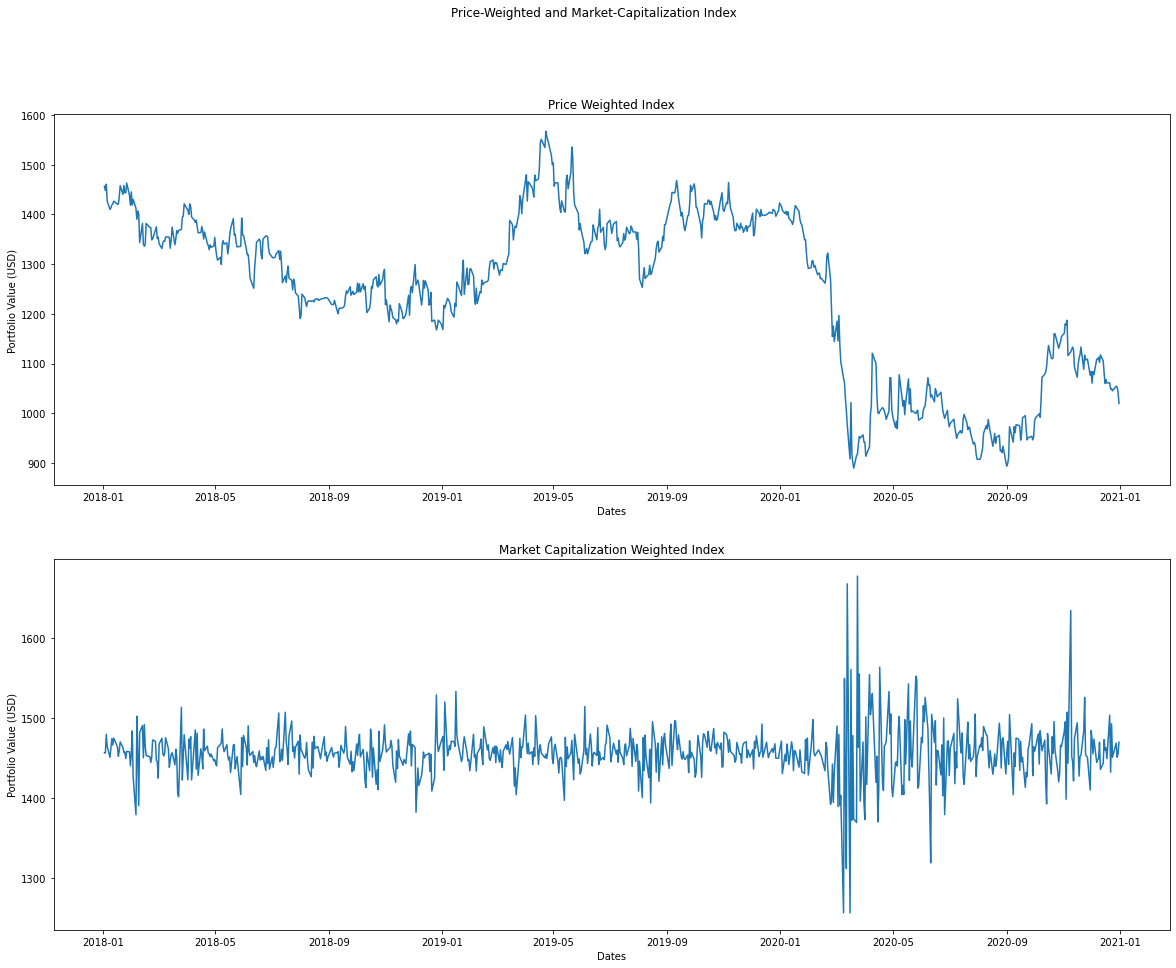

In [14]:
##2A
fig, ((ax1), (ax2)) = plt.subplots(2,1)
fig.set_size_inches(20, 15)

# Overall title
fig.suptitle('Price-Weighted and Market-Capitalization Index')

# Subplot 1 
ax1.plot(Price_Weighted_Index.index, Price_Weighted_Index.Close)
ax1.set_ylabel("Portfolio Value (USD)")
ax1.set_xlabel("Dates")
ax1.set_title("Price Weighted Index")
# Subplot 2
ax2.plot(Market_Cap_Weighted_Index.index, Market_Cap_Weighted_Index.Close)
ax2.set_ylabel("Portfolio Value (USD)")
ax2.set_xlabel("Dates")
ax2.set_title("Market Capitalization Weighted Index")

plt.show()

In [15]:
##2B
def get_monthly_data(dataFrame):
    monthly_dataframe = pd.DataFrame()
    for s in range(0,3):
        for p in range(0,11):
            year = 2018+s
            month = 1+p
            yr_month = str(year)+'-'+str(month)
            month_table = pd.DataFrame(dataFrame.loc[yr_month])
            monthly_dataframe = monthly_dataframe.append(month_table.iloc[0])
    return monthly_dataframe
monthly_PWI = get_monthly_data(Price_Weighted_Index)
monthly_MCWI = get_monthly_data(Market_Cap_Weighted_Index)

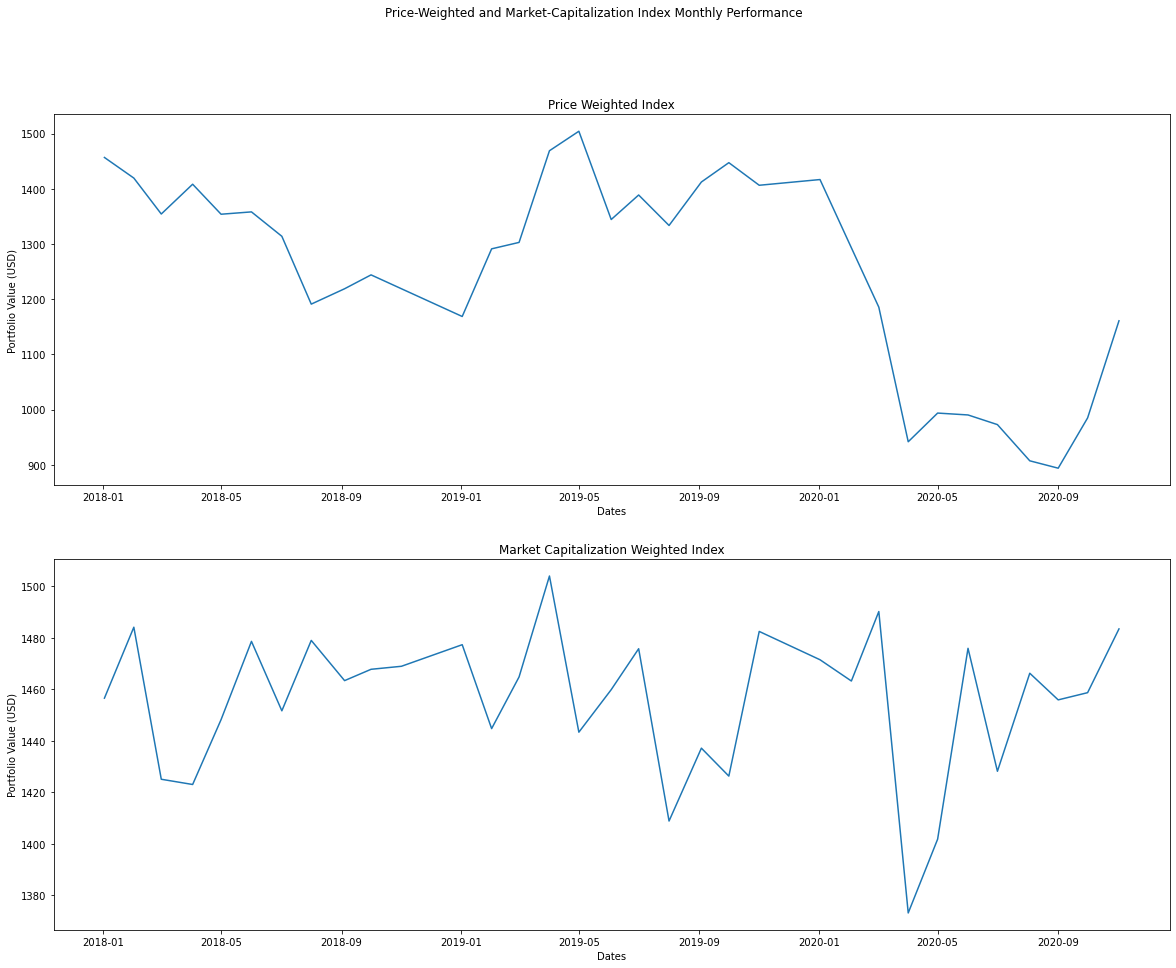

In [16]:
##2B
fig, ((ax1), (ax2)) = plt.subplots(2,1)
fig.set_size_inches(20, 15)

# Overall title
fig.suptitle('Price-Weighted and Market-Capitalization Index Monthly Performance')

# Subplot 1 
ax1.plot(monthly_PWI.index, monthly_PWI.Close)
ax1.set_ylabel("Portfolio Value (USD)")
ax1.set_xlabel("Dates")
ax1.set_title("Price Weighted Index")
# Subplot 2
ax2.plot(monthly_MCWI.index, monthly_MCWI.Close)
ax2.set_ylabel("Portfolio Value (USD)")
ax2.set_xlabel("Dates")
ax2.set_title("Market Capitalization Weighted Index")

plt.show()

### 2C
Comparing these 2 graphs I notice that the daily graph is more noisy and harder to analyze. The daily graphs are influenced by short-term events which make seeing the overall trend hard and only the extremities are shown. The monthly graphs show general trends which make it easier to understand about what is going on. 

## Q3 - Returns


### a) Calculating Monthly Returns 
For the price method and the market cap method, calculate the one-period monthly returns (hint, if you want to save some time, consider using hte pct_change() method). Store the returns for each method in one DataFrame for each time frame so that it has the following columns: `Date`, `Index Value Return`, `Market Cap Return`. Display the last five values and then graph the two values superimposed in one plot. Make sure to include appropriate titles, axis labels and a legend.

Graph these returns for the data from 2018.  Remember to label your graph well.

In [17]:
%%latex
\newpage

<IPython.core.display.Latex object>

In [18]:
##3A
monthly_returns = pd.concat([monthly_MCWI.pct_change(axis='rows'), monthly_PWI.pct_change(axis='rows')], join='inner', axis=1)

In [19]:
monthly_returns.columns = ['Index Value Return', 'Market Cap Return']

In [20]:
monthly_returns.tail(5)

,Index Value Return,Market Cap Return
2020-07-01,-0.032342,-0.017660
2020-08-03,0.026651,-0.067424
2020-09-01,-0.007055,-0.014750
2020-10-01,0.001924,0.101908
2020-11-02,0.016967,0.178661


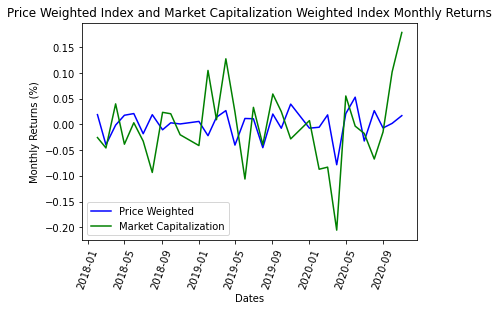

In [21]:
#plotting the chart
plt.plot(monthly_returns.index, monthly_returns.iloc[:,0], color='b', label = 'Price Weighted')
plt.plot(monthly_returns.index, monthly_returns.iloc[:,1], color='g', label = 'Market Capitalization')

plt.title('Price Weighted Index and Market Capitalization Weighted Index Monthly Returns')
plt.xlabel('Dates')
plt.xticks(rotation=70)
plt.ylabel('Monthly Returns (%)')

# Create legend
plt.legend()
plt.show()

### b) Analysis

#### i. Discrepancies
Can you find any cases where the price index returns and market cap returns are going in opposite directions? When does this occur? If there are multiple occurrences, pick one stark region to discuss.  If there are no occurences where the returns move in opposite directions, choose a time when the slopes are signficantly different. 

In [22]:
%%latex
\newpage

<IPython.core.display.Latex object>

2018 May is the first time period where the returns are moving in opposite directions. 

#### ii. Source of Discrepancy
Now that you have the time period, dig into the data to find what could have caused the discrepancies between the two measures' returns during this time period.  This part should be thoroughly quantitatively analyzed.  You should support your analysis with an equally thoroughly written discussion.   

In [23]:
%%latex
\newpage

<IPython.core.display.Latex object>

In [24]:
discrepancy_row = pd.DataFrame(monthly_returns.iloc[4])
print(discrepancy_row.iloc[0]-discrepancy_row.iloc[1])
discrepancy_row.head()

discrepancy_row_IV = pd.DataFrame(monthly_PWI.iloc[4])
discrepancy_row_MC = pd.DataFrame(monthly_MCWI.iloc[4])
print(discrepancy_row_IV)
print(discrepancy_row_MC )
print(discrepancy_row)

2018-05-01    0.0563
dtype: float64
        2018-05-01
Close  1353.777354
        2018-05-01
Close  1448.282617
                    2018-05-01
Index Value Return      0.0177
Market Cap Return      -0.0386


In [25]:
weights_dataframe.loc['2018-04']

,MUFG Closing,BAC Closing,SEB Closing,Total Market Value
Date,,,,
2018-04-02,0.268926,0.727556,0.003518,1.0
2018-04-03,0.270683,0.725861,0.003456,1.0
2018-04-04,0.266666,0.729840,0.003493,1.0
2018-04-05,0.266206,0.730361,0.003433,1.0
2018-04-06,0.265909,0.730629,0.003461,1.0
2018-04-09,0.266454,0.730132,0.003415,1.0
2018-04-10,0.266088,0.730575,0.003336,1.0
2018-04-11,0.269836,0.726768,0.003396,1.0
2018-04-12,0.264133,0.732560,0.003307,1.0


In [26]:
index_dataframe.loc['2018-04']

,MUFG Closing,BAC Closing,SEB Closing,Close
Date,,,,
2018-04-02,6.48,27.118830,4190.795410,1423.093966
2018-04-03,6.60,27.377897,4167.009277,1473.961053
2018-04-04,6.53,27.646215,4229.589355,1462.868002
2018-04-05,6.61,28.053322,4214.631348,1477.007413
2018-04-06,6.45,27.414909,4151.417480,1422.940812
2018-04-09,6.52,27.636965,4131.291992,1469.411311
2018-04-10,6.64,28.201361,4116.432129,1485.456381
2018-04-11,6.64,27.664721,4131.301758,1436.379734
2018-04-12,6.61,28.358650,4091.446289,1481.342454


We notice that the index value return is 0.05% higher than the market cap return. Looking at the calculations of the index value and market cap value, there are various reasons why this could happen. The main reason for this is the lower weighting of Bank of America. Looking at the weightings, the percentage held by the Market Cap Index lowers by 0.9%, and then faces a general down trend. This paired with lower share prices results in the Market Capitalization Index performing poorly because it is heavily weighted by Bank of America. The Price Weighted Index is more heavily weighted by Seaboard, which while declining during the month does not decline enough to show a negative return.